In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import numpy as np

# Delivery Time Dataset

In [2]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA and Data Visualization 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.shape

(21, 2)

In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


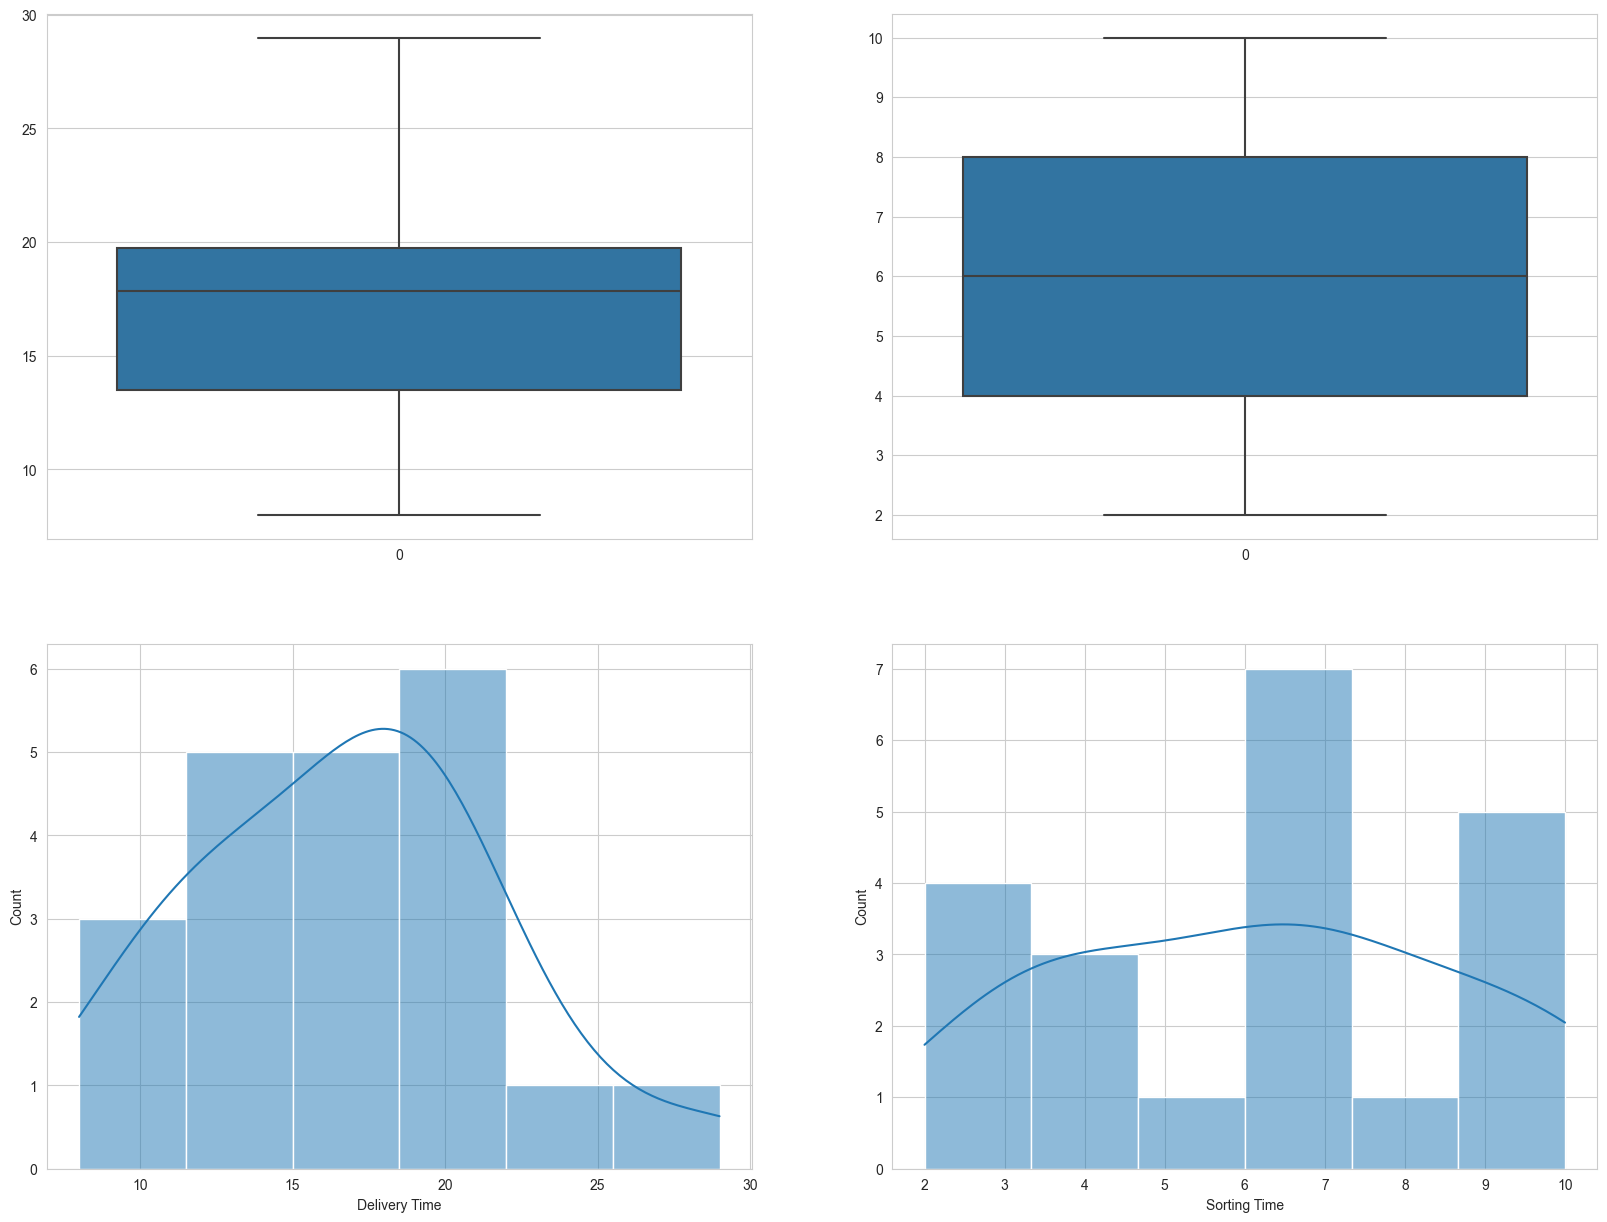

In [9]:
fig,axes = plt.subplots(2,2,figsize=(20,15))
fig1 = sns.boxplot(data['Delivery Time'],ax=axes[0,0])
fig2 = sns.boxplot(data['Sorting Time'],ax=axes[0,1])
fig3 = sns.histplot(data['Delivery Time'],kde=True,ax=axes[1,0])
fig4 = sns.histplot(data['Sorting Time'],kde=True,ax=axes[1,1])
plt.show()

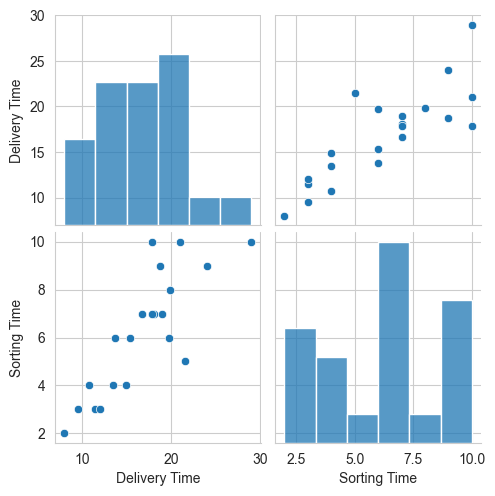

In [10]:
sns.pairplot(data)
plt.show()

In [11]:
data = data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
data.corr()           #Correlation Analysis

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


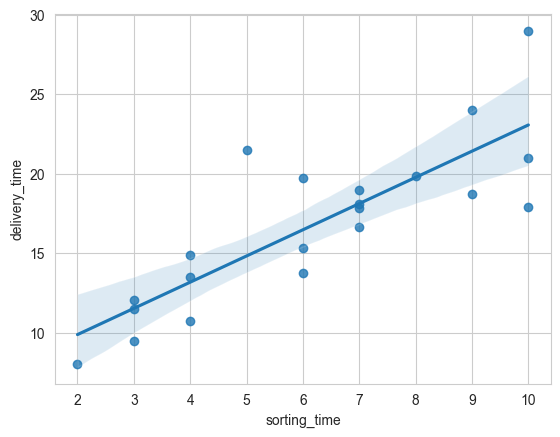

In [13]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])
plt.show()

## Model Building

In [14]:
import statsmodels.formula.api as smf
model1 = smf.ols("delivery_time~sorting_time",data = data).fit()

In [15]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)    

Intercept       6.582734
sorting_time    1.649020
dtype: float64 

 Intercept       3.823349
sorting_time    6.387447
dtype: float64 

 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [16]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        16:35:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2 = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data = data).fit()  #using log

In [19]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)    

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64 

 Intercept               13.085552
np.log(sorting_time)     8.024484
dtype: float64 

 Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


In [20]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 12 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           16:35:15   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model3 = smf.ols("delivery_time~np.square(sorting_time)",data = data).fit()    #using square

In [23]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)    

Intercept                  11.237205
np.square(sorting_time)     0.124870
dtype: float64 

 Intercept                  9.398601
np.square(sorting_time)    5.691330
dtype: float64 

 Intercept                  1.415704e-08
np.square(sorting_time)    1.739194e-05
dtype: float64


In [24]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6302871815826638, 0.6108286121922777)

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.74e-05
Time:                        16:35:15   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sorting_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model4 = smf.ols("delivery_time~np.sqrt(sorting_time)",data = data).fit()  #using square root

In [27]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)    

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64 

 Intercept               -0.840911
np.sqrt(sorting_time)    6.592434
dtype: float64 

 Intercept                0.410857
np.sqrt(sorting_time)    0.000003
dtype: float64


In [28]:
#R squared values
(model4.rsquared,model4.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

In [29]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           2.61e-06
Time:                        16:35:15   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference: Y = 1.741987 + 0.597522 X (Model 2) is the best suited model for sorting time

# Salary Dataset

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

In [31]:
salary = pd.read_csv('Salary_data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [33]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [35]:
salary.shape

(30, 2)

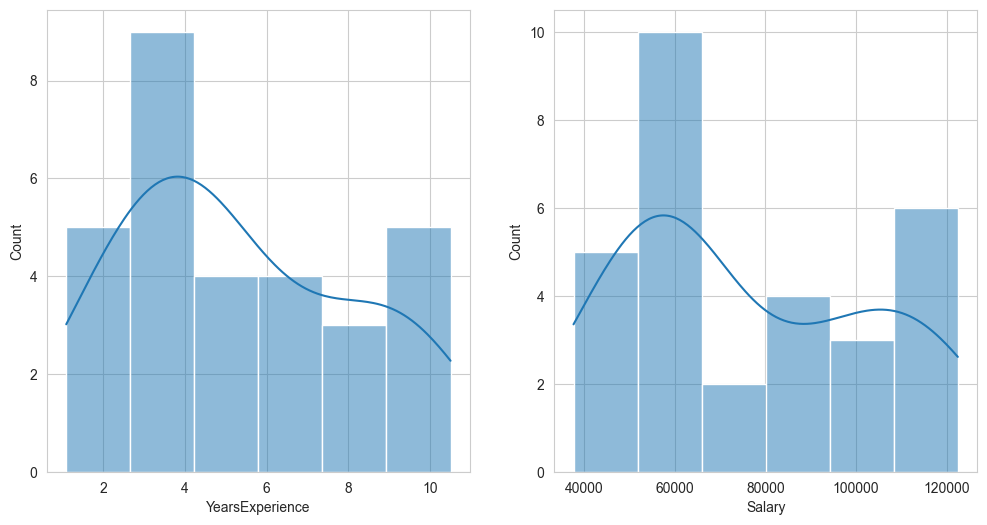

In [36]:
fig,axes = plt.subplots(1,2,figsize=(12,6))
fig1 = sns.histplot(salary['YearsExperience'],kde=True,ax=axes[0])
fig2 = sns.histplot(salary['Salary'],kde=True,ax=axes[1])
plt.show()

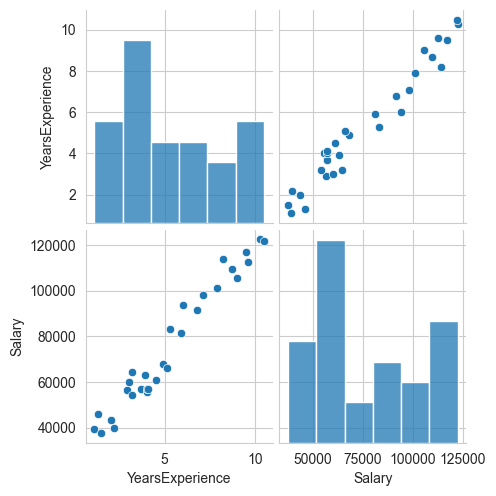

In [37]:
sns.pairplot(salary)
plt.show()

In [38]:
salary.corr()          #Correlation Analysis

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [39]:
salary = salary.rename({'YearsExperience':'Experience'},axis=1)
salary.head()                          

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


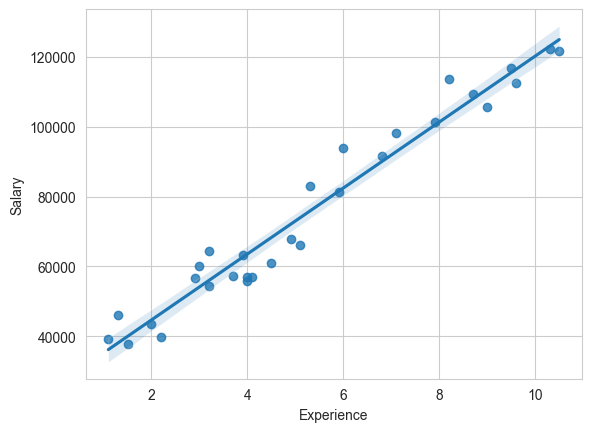

In [40]:
sns.regplot(x=salary['Experience'],y=salary['Salary'])
plt.show()

## Model Building

In [41]:
model1 = smf.ols("Salary~Experience",data = salary).fit()

In [42]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)    

Intercept     25792.200199
Experience     9449.962321
dtype: float64 

 Intercept     11.346940
Experience    24.950094
dtype: float64 

 Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64


In [43]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        16:35:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Prediction for Salary hike
newdata=pd.Series([7,15])
data_pred=pd.DataFrame(newdata,columns=['Experience'])
data_pred

,Experience
0,7
1,15


In [46]:
model1.predict(data_pred)

0     91941.936449
1    167541.635020
dtype: float64

In [47]:
model2 = smf.ols("Salary~np.log(Experience)",data = salary).fit()   #using log

In [48]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)    

Intercept             14927.97177
np.log(Experience)    40581.98796
dtype: float64 

 Intercept              2.895135
np.log(Experience)    12.791989
dtype: float64 

 Intercept             7.268813e-03
np.log(Experience)    3.250155e-13
dtype: float64


In [49]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        16:35:18   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Experience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model3 = smf.ols("Salary~np.square(Experience)",data = salary).fit()   #using square

In [52]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)    

Intercept                48042.585515
np.square(Experience)      776.318773
dtype: float64 

 Intercept                21.973654
np.square(Experience)    17.397015
dtype: float64 

 Intercept                3.389190e-19
np.square(Experience)    1.518127e-16
dtype: float64


In [53]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.9153198857852565, 0.9122955959918728)

In [54]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.52e-16
Time:                        16:35:18   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(Experience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model4 = smf.ols("Salary~np.sqrt(Experience)",data = salary).fit()   #using square

In [56]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)    

Intercept             -16055.769117
np.sqrt(Experience)    41500.680583
dtype: float64 

 Intercept              -3.262308
np.sqrt(Experience)    19.437148
dtype: float64 

 Intercept              2.906965e-03
np.sqrt(Experience)    8.565358e-18
dtype: float64


In [57]:
#R squared values
(model4.rsquared,model4.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

In [58]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           8.57e-18
Time:                        16:35:18   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(Experience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference: Y = 25792.2 + 9450X (Model) is best suited for salary hike